<a href="https://colab.research.google.com/github/microprediction/winningnotebooks/blob/main/Standard_Horse_Race_10_Runners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install winning

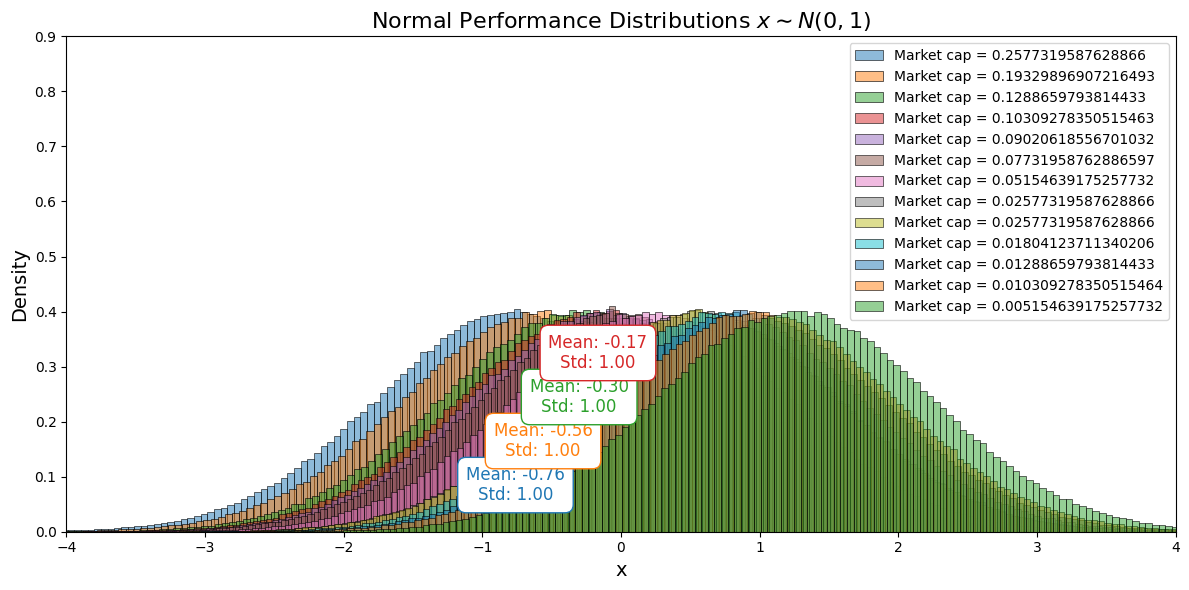

In [11]:
# Import required packages
from winning.std_calibration import centered_std_density
from winning.lattice_calibration import dividend_implied_ability
import numpy as np
import matplotlib.pyplot as plt
from winning.lattice_plot import densitiesPlot
from winning.lattice import skew_normal_density
import seaborn as sns

# Choose the length of the lattice, which is 2*L+1
L = 600
BINS = 200

# Choose the unit of discretization
unit = 0.01

# Step 1. The unit is used to create an approximation of a density, here N(0,1) for simplicity
density = centered_std_density(L=L, unit=unit)

# Step 2. Set winning probabilities (hazard rates), commonly represented as inverse probabilities ('dividends')
hazard_rates = [0.2, 0.15, 0.10, 0.08, 0.07, 0.06, 0.04, 0.02, 0.02, 0.014, 0.01, 0.008, 0.004]  # Example hazard rates
sum_haz = sum(hazard_rates)
hazard_rates = [ h/sum_haz for h in hazard_rates ]
dividends = [1/h for h in hazard_rates]  # Convert hazard rates to dividends (1/h)

# Step 3. Calculate relative abilities
abilities = dividend_implied_ability(dividends=dividends, density=density, nan_value=2000, unit=unit)

# Step 4. Generate skew-normal densities for each ability
densities = [skew_normal_density(L=L, unit=unit, loc=a, a=0, scale=1.0) for a in abilities]

# Step 5. Generate samples from densities for plotting histograms
n_samples = 1000000

# Dynamically generate a color palette based on the number of densities
colors = sns.color_palette("tab10", n_colors=len(densities))

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.set_xlim([-4, 4])
ax.set_ylim(0, 0.9)

# Plot each distribution with unique color and annotate
for i, (density, ability, color) in enumerate(zip(densities, abilities, colors)):
    samples = np.random.normal(loc=ability, scale=1, size=n_samples)
    label = f'Market cap = {hazard_rates[i]}'

    # Plot histogram with unique color
    sns.histplot(samples, color=color, kde=False, stat='density', bins=BINS, label=label, alpha=0.5, ax=ax)

    # Calculate mean and standard deviation
    mean = np.mean(samples)
    std_dev = np.std(samples)

    if i<=3:
      # Annotate mean and standard deviation
      ax.annotate(f'Mean: {mean:.2f}\nStd: {std_dev:.2f}',
                  xy=(mean, 0.12 + (0.08 * i)), color=color, fontsize=12,
                  ha='center', va='top', bbox=dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.5'))

# Add title, labels, and legend
ax.set_title(r'Normal Performance Distributions $x \sim N(0,1)$', fontsize=16)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'Density', fontsize=14)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()


Correlation

In [13]:
!pip install randomcov

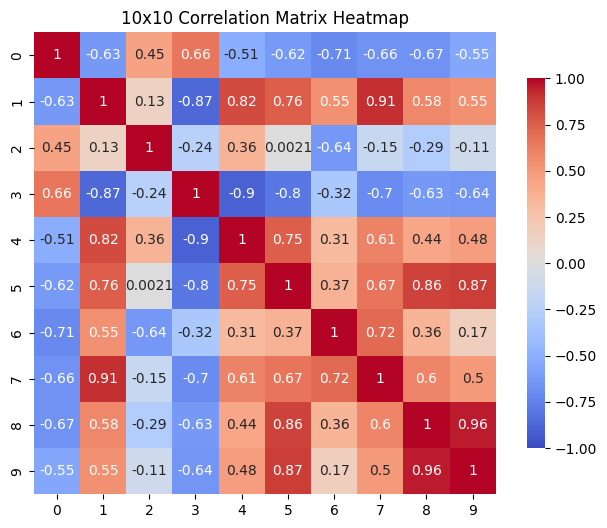

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from randomcov import random_covariance_matrix
cov = random_covariance_matrix(n=10, corr_method='residuals', var_method='lognormal')


# Convert to a correlation matrix
d = np.sqrt(np.diag(cov))  # standard deviations
correlation_matrix = cov / np.outer(d, d)

# Plot the heat map
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8})
plt.title('10x10 Correlation Matrix Heatmap')
plt.show()


To be continued ...